In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pylab as plt
import json
import os
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)
#import Psycopg
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


In [7]:
from usefulFunctions import ColumnSearcher

In [171]:
v=pd.read_csv("https://data.gov.in/node/100691/datastore/export/csv")

In [172]:
vt=v.T
vt=vt.reset_index()
vt.columns=vt.ix[2]

In [174]:
vt=vt.drop([0,1,2])

In [179]:
placesAndYear=vt['Type of Vehicles'].apply(lambda x:x.split())

In [195]:
vt['Place']=placesAndYear.apply(lambda x:x[0])
vt['Date']=placesAndYear.apply(lambda x:x[2].replace('.','/'))

In [198]:
vt1=vt.drop('Type of Vehicles',1)

In [201]:
vt1.head()

2,Multiaxled / Articulated Vehicles,Trucks and Lorries,Four Wheelers,Three Wheelers,Total Light Motor Vehicles (Goods),Stage carriages,Contract carriages,Private service vehicles,Other buses,Total Buses,...,Total Two wheelers,Cars,Jeeps,Omni buses,Tractors,Trailers,Other vehicles not covered,Total Non-Transport,Place,Date
3,9112,NaN,4751,12169,16920,NaN,NaN,NaN,NaN,16462,...,1.1327e+06,179226,12439,NaN,111,219,2263,1.32695e+06,AHMEDABAD,31/3/2007
4,9169,NaN,5254,14299,19553,NaN,NaN,NaN,NaN,16803,...,1.23569e+06,199777,13666,NaN,147,298,2430,1.45201e+06,AHMEDABAD,31/3/2008
5,9277,NaN,5739,15144,20883,NaN,NaN,NaN,NaN,17407,...,1.3126e+06,218805,14515,NaN,241,361,2692,1.54922e+06,AHMEDABAD,31/3/2009
6,13345,69282,41452,26325,67777,6002,540,6384,8397,21323,...,1446807,344053,6456,26100,10601,4592,5660,1844269,BENGALURU,31/3/2007
7,14298,72907,44654,29465,74119,6142,511,7385,9287,23325,...,1656128,519619,6566,30693,9572,5297,6128,2234003,BENGALURU,31/3/2008


In [206]:
yr=vt.Date.apply(lambda x:x.split('/')[2])

In [219]:
'2008*'.strip('*')

'2008'

In [221]:
def chk(x):
    try:
        return float(x)
    except:
        return float(x.strip("*"))
yr=yr.apply(chk)

In [225]:
vt1['yr']=yr

In [229]:
vt1.groupby('yr').sum()

2,Multiaxled / Articulated Vehicles,Trucks and Lorries,Four Wheelers,Three Wheelers,Total Light Motor Vehicles (Goods),Stage carriages,Contract carriages,Private service vehicles,Other buses,Total Buses,...,Total Two wheelers,Cars,Jeeps,Omni buses,Tractors,Trailers,Other vehicles not covered,Total Non-Transport,Place,Date
yr,,,,,,,,,,,,,,,,,,,,,
2007,164343,444966,325330,158905,575933,48767,28241,18297,36575,220003,...,18665257,4580967,256462,158968,147641,64735,125768,23999798,AHMEDABADBENGALURUBHOPALCHENNAICOIMBATOREDELHI...,31/3/200731/3/200731/3/200731/3/200731/3/20073...
2008,147727,468168,414970,179753,700054,52016,30278,19814,39180,227772,...,20058233,5118949,271656,166054,154586,63326,110061,25942865,AHMEDABADBENGALURUBHOPALCHENNAICOIMBATOREDELHI...,31/3/200831/3/200831/3/200831/3/200831/3/20083...
2009,137743,496028,429015,233549,786744,54701,31485,21930,33596,231089,...,21673037,5592729,284209,174484,163923,67064,113244,28068690,AHMEDABADBENGALURUBHOPALCHENNAICOIMBATOREDELHI...,31/3/200931/3/200931/3/200931/3/200931/3/20093...


In [230]:
vt1.columns

Index([u'Multiaxled / Articulated Vehicles', u'Trucks and Lorries',
       u'Four Wheelers', u'Three Wheelers',
       u'Total Light Motor Vehicles (Goods)', u'Stage carriages',
       u'Contract carriages', u'Private service vehicles', u'Other buses',
       u'Total Buses', u'Motor cabs', u'Maxi cabs', u'Other taxis',
       u'Total Taxis', u'Three seaters', u'Four to six seaters',
       u'Total Light Motor Vehicles (Passengers)', u'Motor cycles on hire',
       u'Total Transport', u'Scooters', u'Mopeds', u'Motor cycles',
       u'Total Two wheelers', u'Cars', u'Jeeps', u'Omni buses', u'Tractors',
       u'Trailers', u'Other vehicles not covered', u'Total Non-Transport',
       u'Place', u'Date', u'yr'],
      dtype='object', name=2)

In [233]:
s=ColumnSearcher(vt1,['Total'])

In [239]:
import json
import urllib2
#from pprint import pprint

url='https://data.gov.in/node/735281/datastore/export/json'
request = urllib2.urlopen(url)
data = json.load(request)

#pprint(data)

In [263]:
data['fields']#['u'id': u'a', u'label'']

[{u'id': u'a', u'label': u'Year (As on 31st March)', u'type': u'string'},
 {u'id': u'b', u'label': u'All Vehicles', u'type': u'string'},
 {u'id': u'c', u'label': u'Two Wheelers*', u'type': u'string'},
 {u'id': u'd', u'label': u'Cars, Jeeps and Taxis', u'type': u'string'},
 {u'id': u'e', u'label': u'Buses @', u'type': u'string'},
 {u'id': u'f', u'label': u'Goods Vehicles', u'type': u'string'},
 {u'id': u'g', u'label': u'Others**', u'type': u'string'}]

In [404]:
df=pd.DataFrame(data['data'])
df.columns=['Year (As on 31st March)','All Vehicles','Two Wheelers','Cars, Jeeps and Taxis','Buses','Goods Vehicles','Others']

In [405]:
df=df.astype(int)

In [406]:
df.columns[1:]

Index([u'All Vehicles', u'Two Wheelers', u'Cars, Jeeps and Taxis', u'Buses',
       u'Goods Vehicles', u'Others'],
      dtype='object')

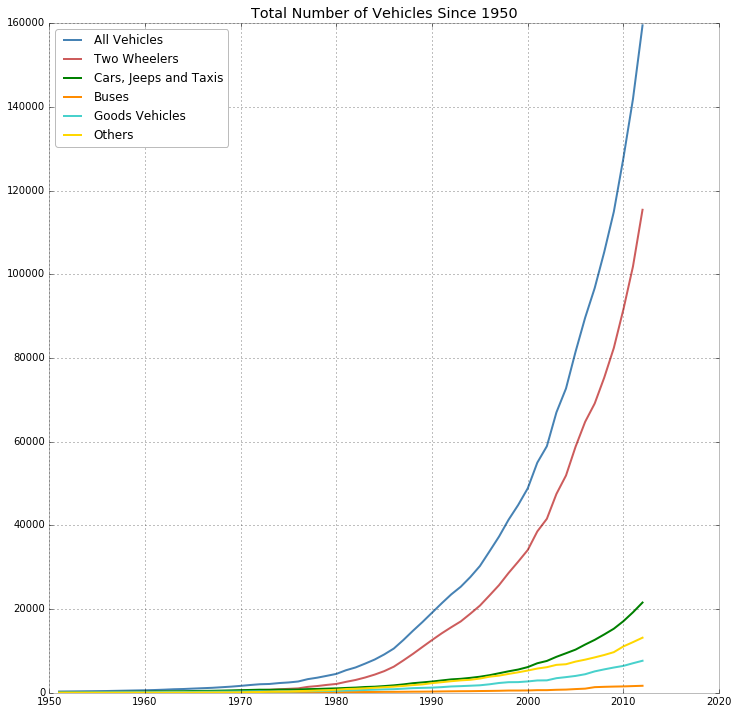

In [407]:
plt.figure(figsize=(12,12))
for i in df.columns:
    if(i!='Year (As on 31st March)' ):
        plt.plot(df['Year (As on 31st March)'],df[i])
plt.legend(df.columns[1:],loc=2)
plt.title("Total Number of Vehicles Since 1950")

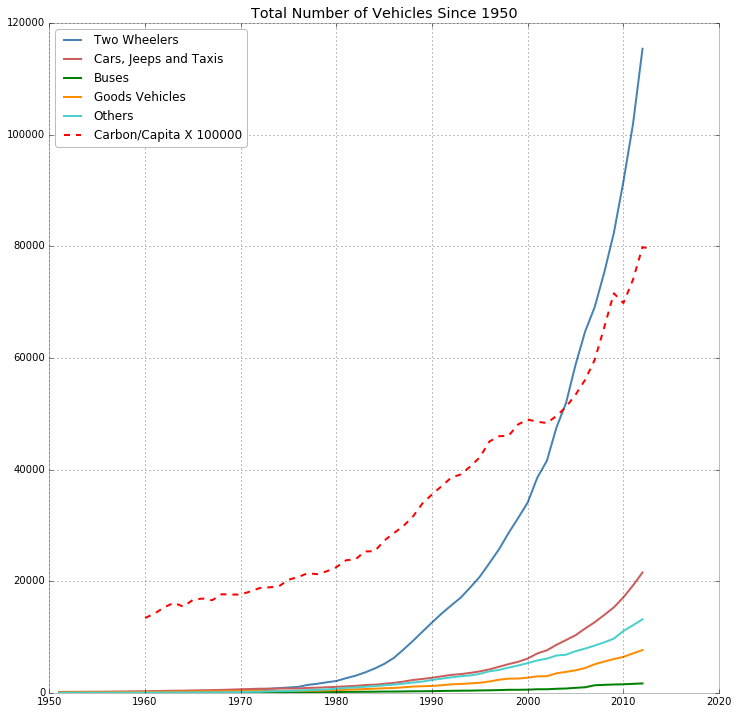

In [409]:
plt.figure(figsize=(12,12))
k=['Two Wheelers','Cars, Jeeps and Taxis','Buses','Goods Vehicles','Others']
for i in k:
    if(i!='Year (As on 31st March)' ):
        plt.plot(df['Year (As on 31st March)'],df[i])
plt.plot(c['year'],(c['CO2 emissions (metric tons per capita)'])*50000,'r--')
plt.legend(k+['Carbon/Capita X 100000'],loc=2)
plt.title("Total Number of Vehicles Since 1950")


In [305]:
carbon =pd.read_excel('/Users/nikhilkishore/Google Drive/personal Efforts/Delhi/Data/carbon/carbon.xls')

In [343]:
c=carbon[carbon['Country Name']=='India'].T

In [344]:
c.columns=['CO2 emissions (metric tons per capita']

In [345]:
c=c.drop(['Country Name','Country Code','Indicator Name','Indicator Code'],0)

In [346]:
c=c.reset_index()
c.columns=['year','CO2 emissions (metric tons per capita)']

In [378]:
df.columns=[u'year', u'All Vehicles', u'Two Wheelers',
       u'Cars, Jeeps and Taxis', u'Buses', u'Goods Vehicles', u'Others']

In [381]:
dfnew=df.merge(c,on='year',how='inner')

In [387]:
dfnew.columns=[u'year',u'All_Vehicles',u'Two_Wheelers',u'Cars_JeepsAndTaxis',u'Buses',u'Goods_Vehicles',u'Others',u'CO2_emissions']

In [392]:
dfnew=dfnew.astype(float)

In [393]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:          CO2_emissions   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     895.2
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           2.25e-45
Time:                        18:40:22   Log-Likelihood:                 100.62
No. Observations:                  53   AIC:                            -189.2
Df Residuals:                      47   BIC:                            -177.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.2619      0

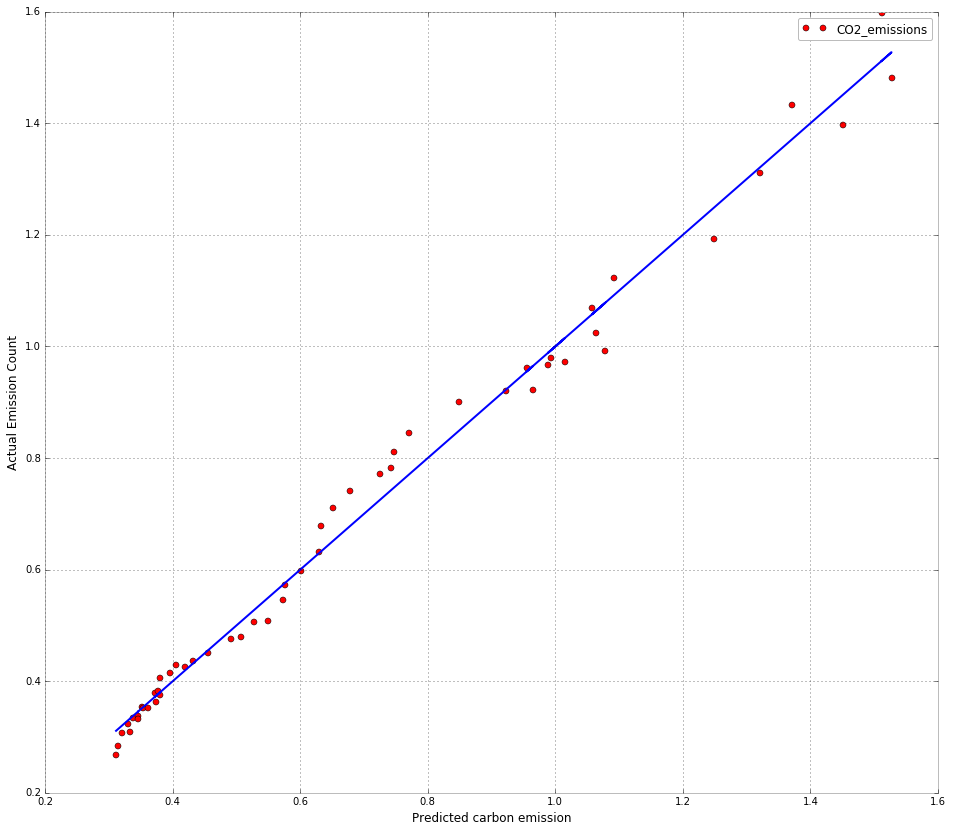

In [399]:
plt.figure(figsize=(16, 14))
ax1 = plt.subplot(111)
lm= smf.ols(formula= "CO2_emissions~ Two_Wheelers+ Cars_JeepsAndTaxis+ Buses+ Goods_Vehicles+ Others", data=dfnew,missing='drop').fit()
print(lm.summary())
lmy = lm.predict(dfnew)
plt.plot(lmy,dfnew.CO2_emissions,'or')
plt.plot(lmy,lmy,'-b') 
plt.xlabel('Predicted carbon emission')
plt.ylabel('Actual Emission Count')
lgnd= plt.legend()